In [1]:
from robyn.modeling.clustering.clustering_config import ClusteringConfig, ClusterBy
from robyn.modeling.clustering.cluster_builder import ClusterBuilder
from robyn.modeling.entities.pareto_result import ParetoResult
from robyn.data.entities.holidays_data import HolidaysData
from robyn.data.entities.enums import DependentVarType
import logging
# Set the log level to DEBUG
import os
import logging
log_level = os.environ.get('LOG_LEVEL', 'INFO')
logging.basicConfig(level=getattr(logging, log_level.upper()))


In [2]:

import pickle

# load the variable from the file
with open("pareto_result.pkl", "rb") as f:
    pareto_result: ParetoResult = pickle.load(f)
with open("mmmdata.pkl", "rb") as f:
    mmm_data = pickle.load(f)
with open("holidays_data.pkl", "rb") as f:
    holidays_data:HolidaysData = pickle.load(f)


In [3]:
cluster_builder = ClusterBuilder(pareto_result=pareto_result)

2024-11-14 09:59:34 - robyn.modeling.clustering.cluster_builder - INFO - Initializing ClusterBuilder
2024-11-14 09:59:34 - robyn.modeling.clustering.cluster_builder - INFO - ClusterBuilder initialization complete


In [4]:
configs = ClusteringConfig(
    dep_var_type= DependentVarType(mmm_data.mmmdata_spec.dep_var_type),
    cluster_by = ClusterBy.HYPERPARAMETERS,
    max_clusters = 10,
    min_clusters = 3,
    weights=[1.0, 1.0, 1.0]
)
cluster_results  = cluster_builder.cluster_models(configs)

2024-11-14 09:59:34 - robyn.modeling.clustering.cluster_builder - INFO - Starting model clustering process
2024-11-14 09:59:34 - robyn.modeling.clustering.cluster_builder - INFO - Clustering by: ClusterBy.HYPERPARAMETERS
2024-11-14 09:59:34 - robyn.modeling.clustering.cluster_builder - INFO - Starting optimal cluster selection
2024-11-14 09:59:34 - robyn.modeling.clustering.cluster_builder - INFO - Ignored features: nrmse_train, sol_id, nrmse_val, mape, nrmse_test, nrmse, pareto, decomp.rssd
2024-11-14 09:59:34 - robyn.modeling.clustering.cluster_builder - INFO - Starting WSS calculation for 30 clusters
2024-11-14 09:59:34 - robyn.modeling.clustering.cluster_builder - INFO - Selected optimal number of clusters: 6
2024-11-14 09:59:34 - robyn.modeling.clustering.cluster_builder - INFO - Selected 6 clusters
2024-11-14 09:59:34 - robyn.modeling.clustering.cluster_builder - INFO - Ignored features: nrmse_train, sol_id, nrmse_val, mape, nrmse_test, nrmse, pareto, decomp.rssd
2024-11-14 09:59

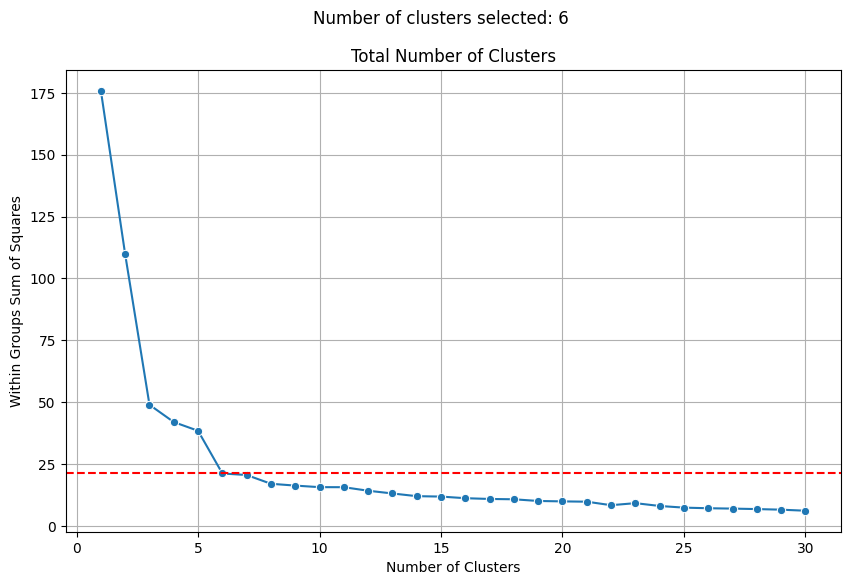

In [5]:
cluster_results.wss

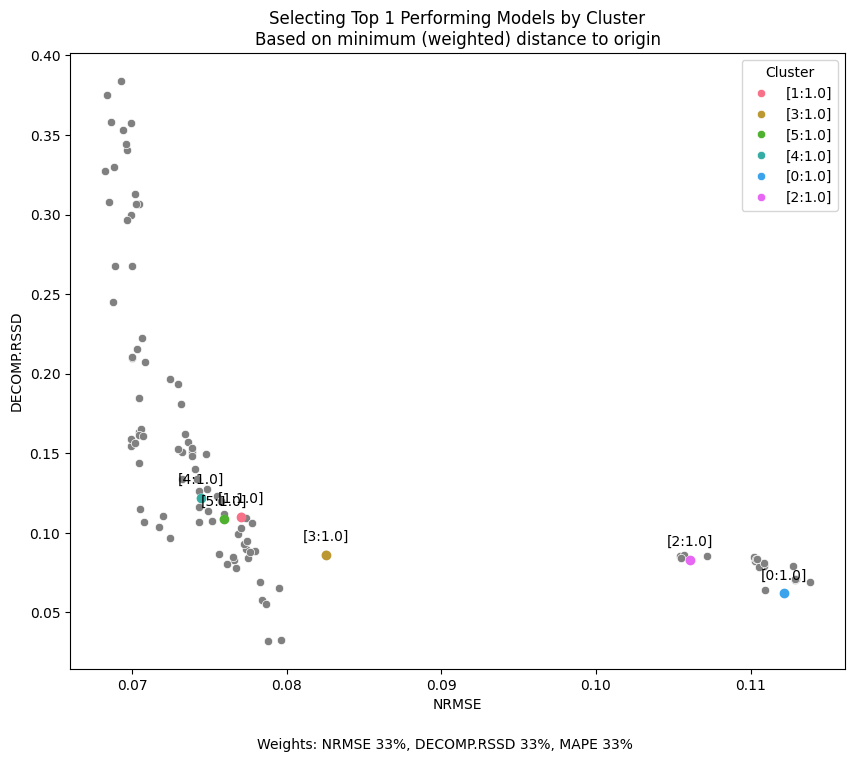

In [6]:
cluster_results.plots.top_solutions_errors_plot

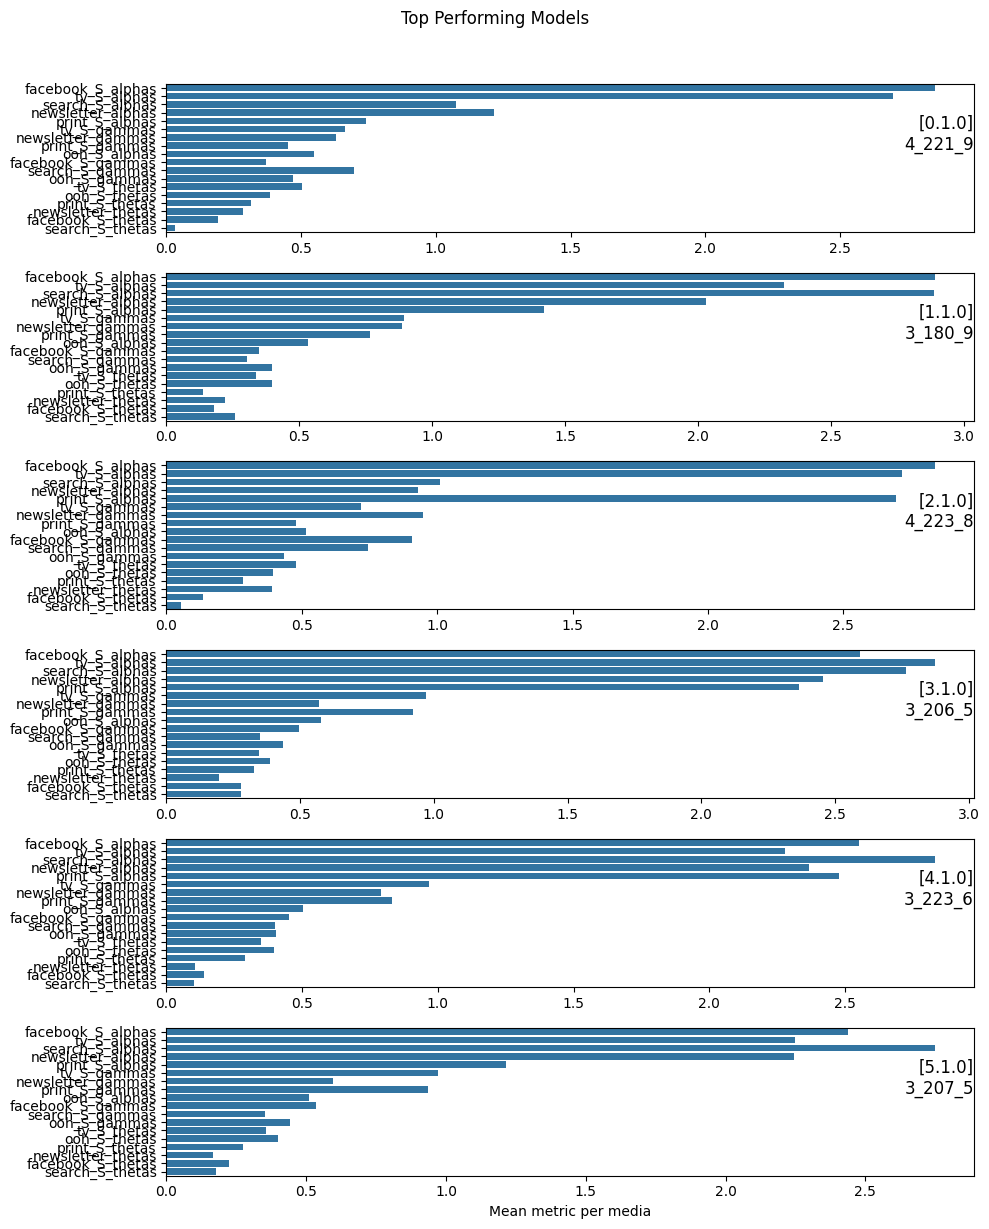

In [7]:
cluster_results.plots.top_solutions_rois_plot

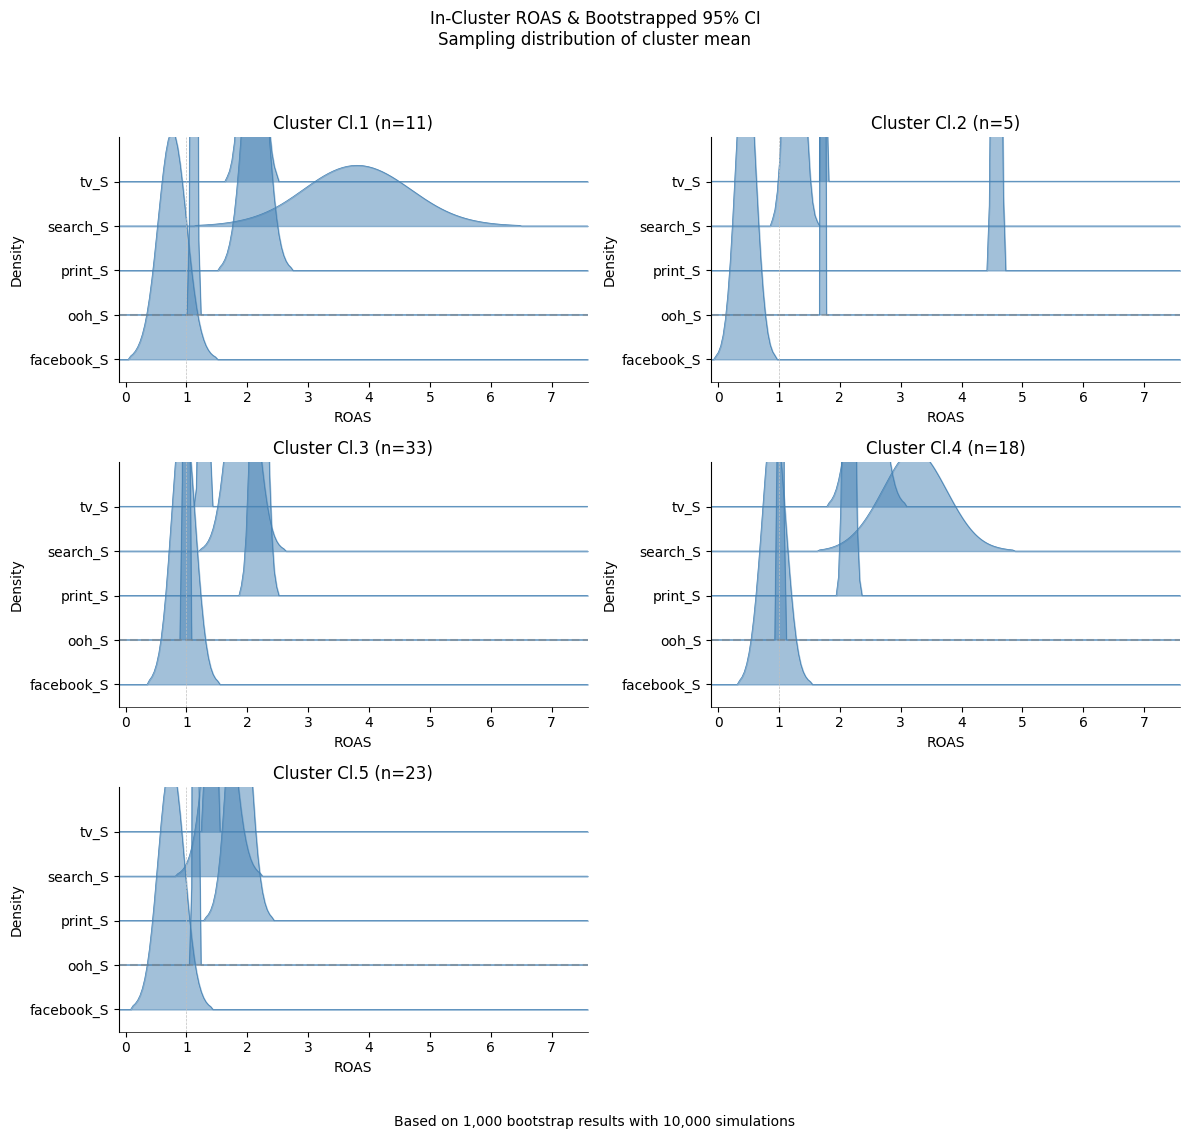

In [8]:
cluster_results.cluster_ci.clusters_confidence_interval_plot

In [9]:
print("clusters: ", cluster_results.n_clusters,
"\nerror weights/balance: ", cluster_results.errors_weights,
"\nboot_n: ", cluster_results.cluster_ci.boot_n,
"\nsim_n: ", cluster_results.cluster_ci.sim_n)


clusters:  6 
error weights/balance:  [1.0, 1.0, 1.0] 
boot_n:  1000 
sim_n:  10000


In [10]:
cluster_results.top_solutions['sol_id']

8009    4_221_9
5633    3_180_9
8026    4_223_8
5863    3_206_5
6017    3_223_6
5872    3_207_5
Name: sol_id, dtype: object

In [14]:
from robyn.modeling.pareto.pareto_utils import ParetoUtils

utils = ParetoUtils()
new_pareto_results = utils.process_pareto_clustered_results(pareto_result, clustered_result=cluster_results, ran_cluster=True, ran_calibration= False)

[<Figure size 2000x1500 with 8 Axes>,
 <Figure size 2000x1500 with 8 Axes>,
 <Figure size 2000x1500 with 8 Axes>,
 <Figure size 2000x1500 with 8 Axes>,
 <Figure size 2000x1500 with 8 Axes>,
 <Figure size 2000x1500 with 8 Axes>]

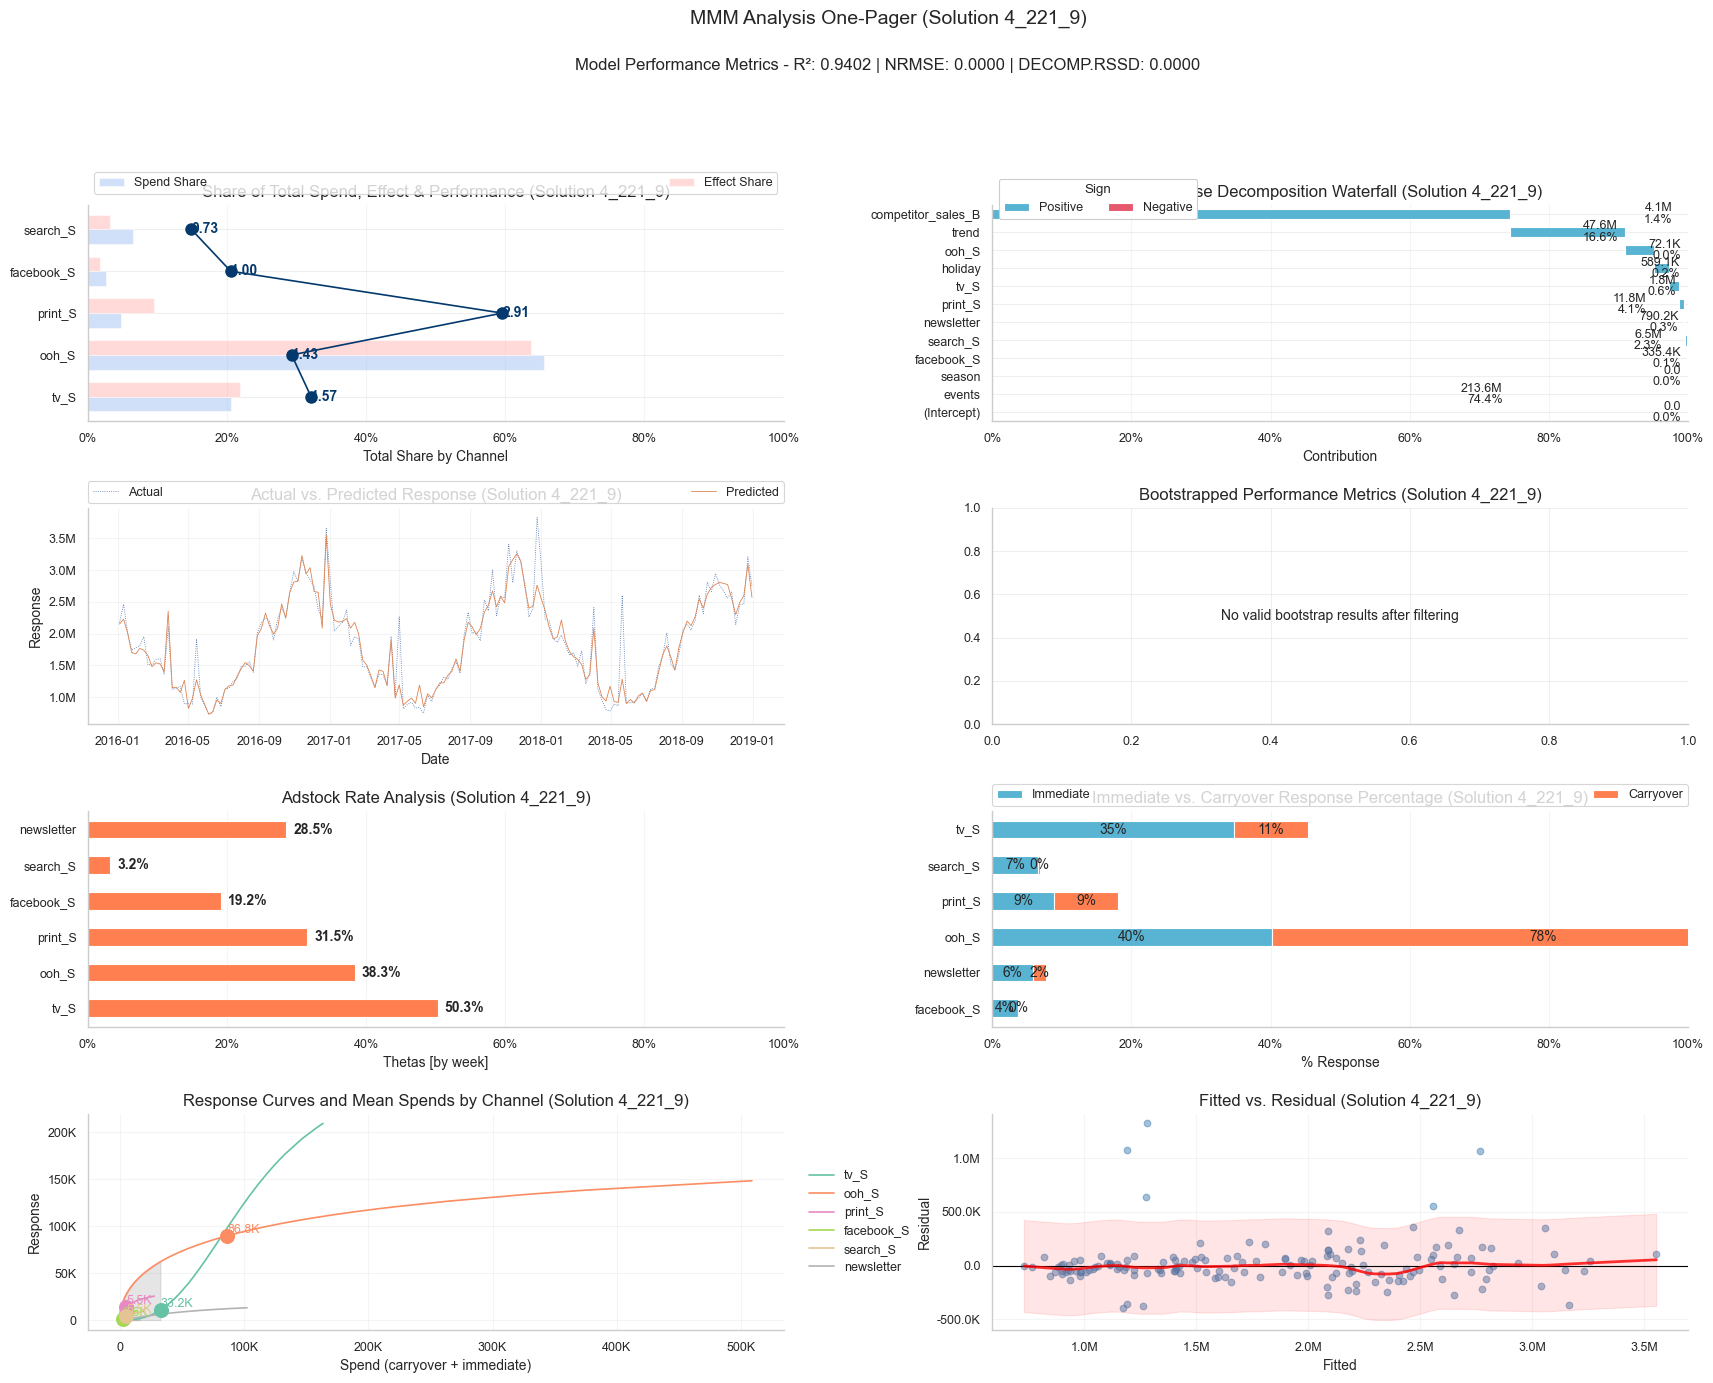

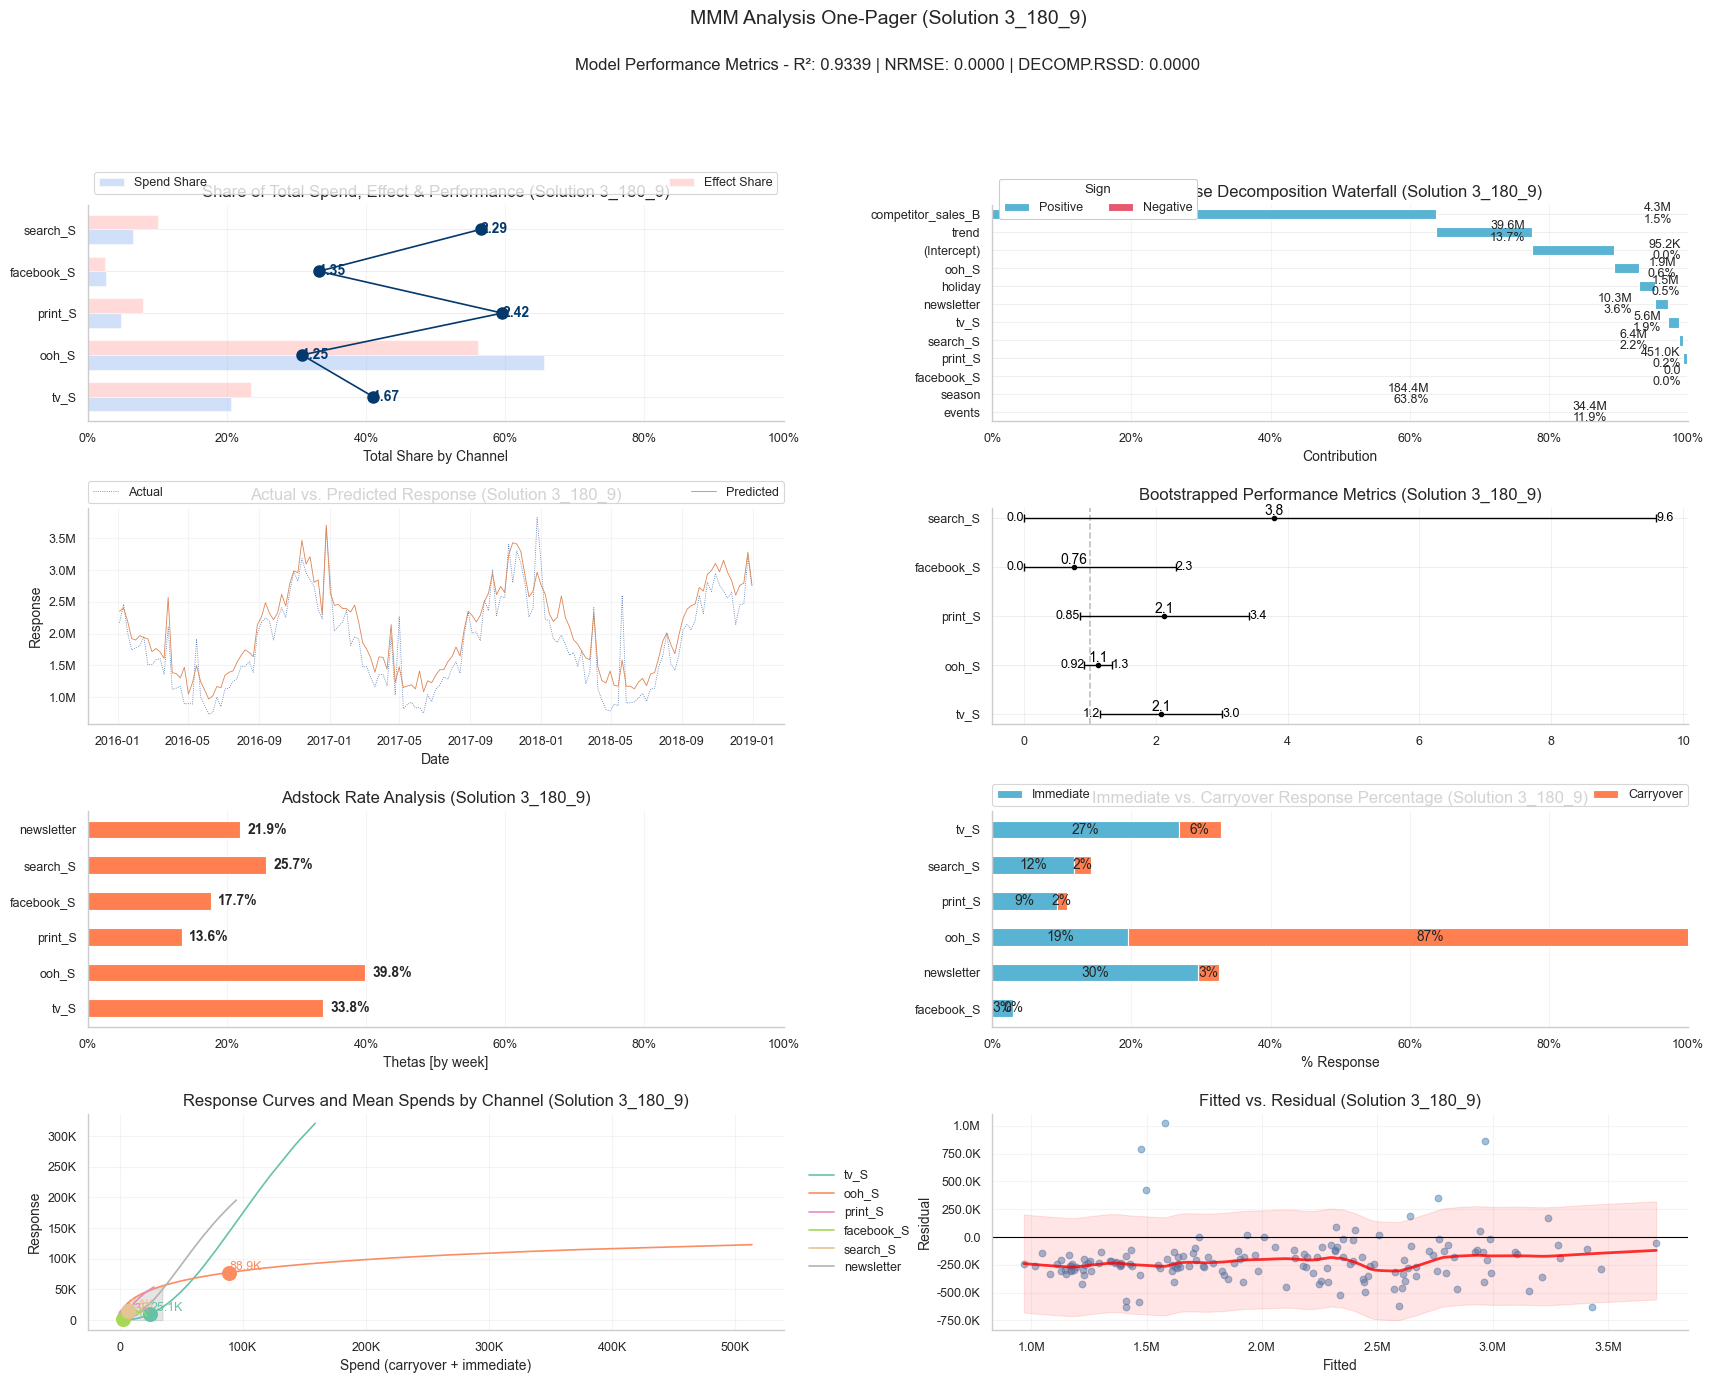

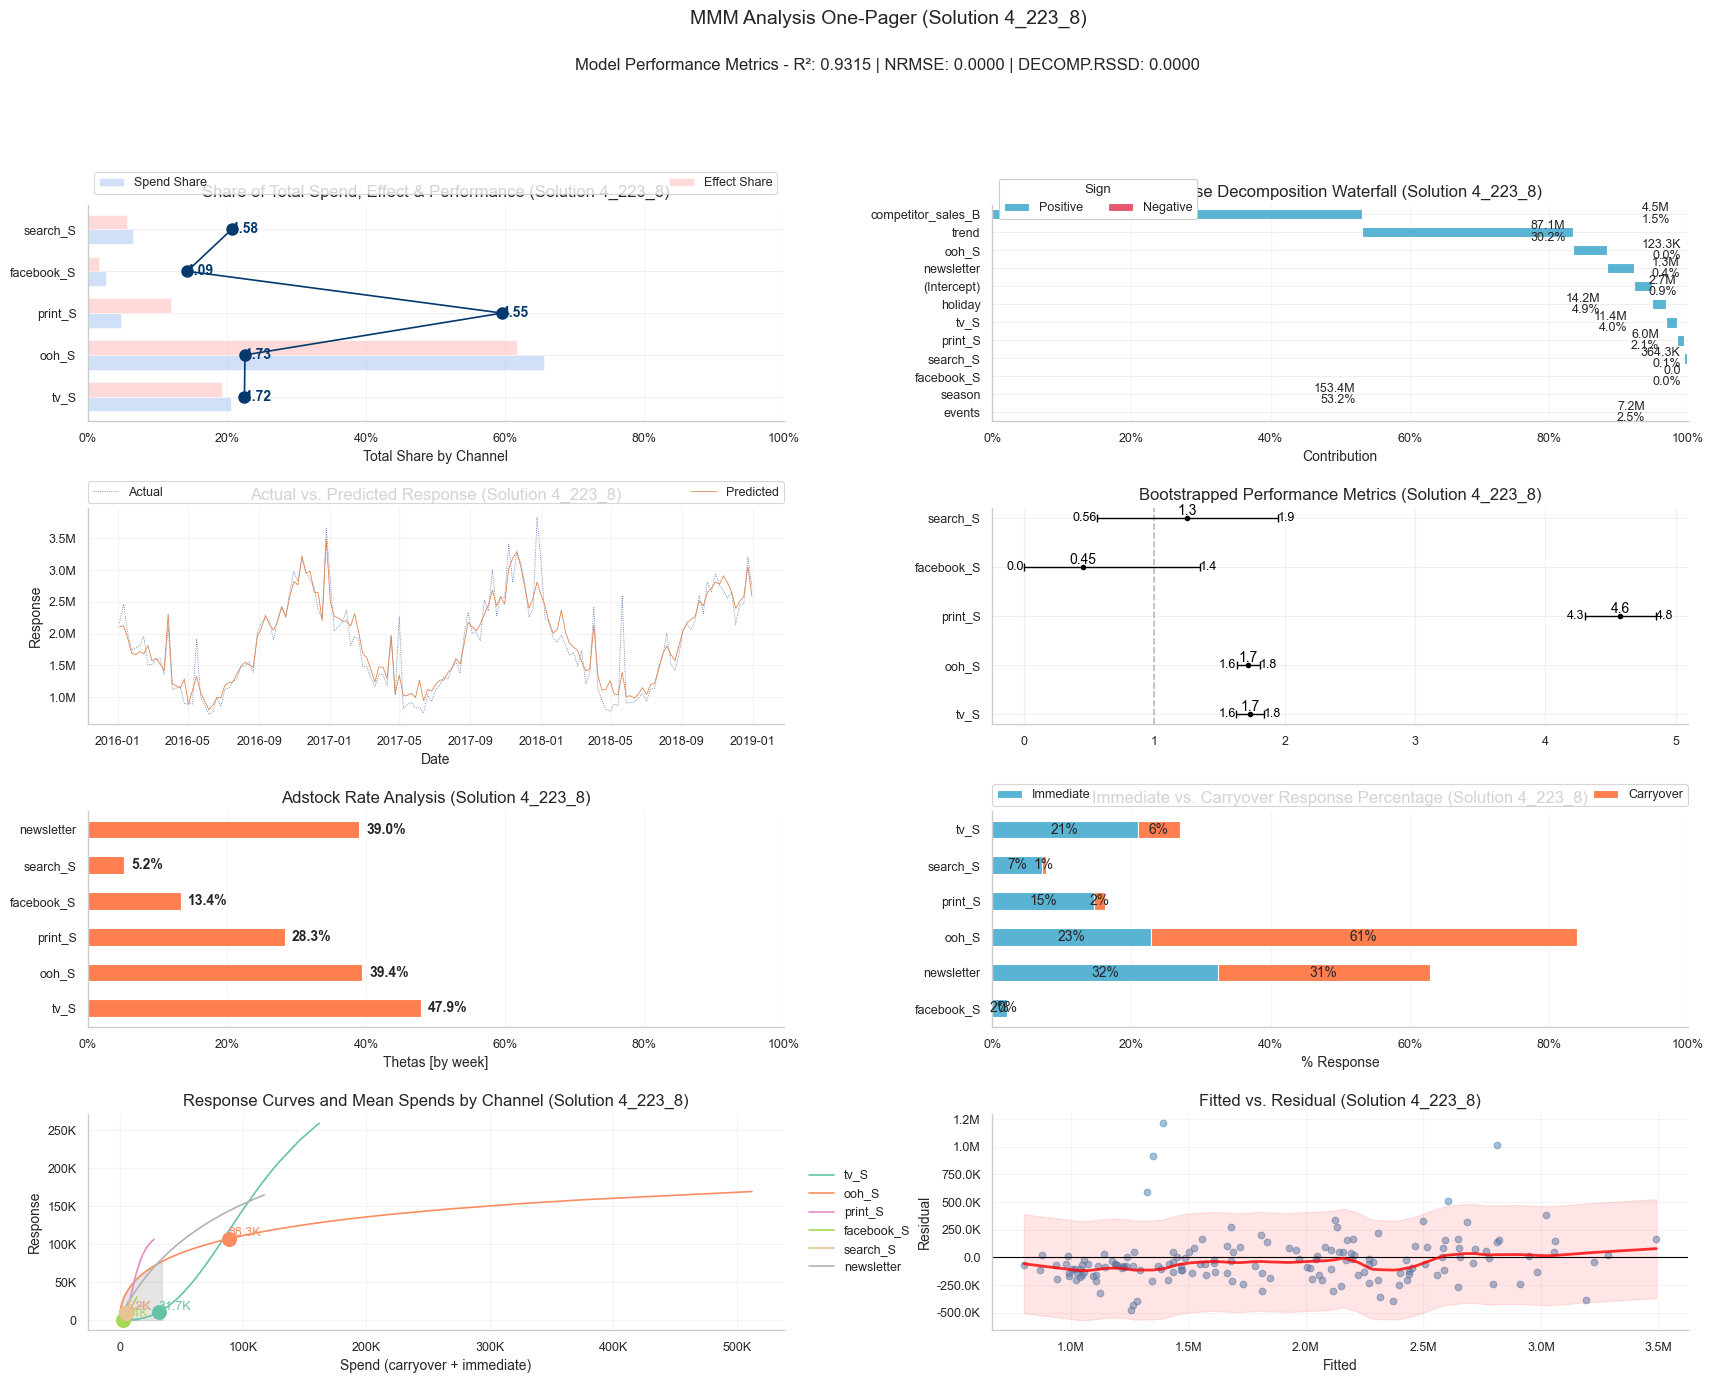

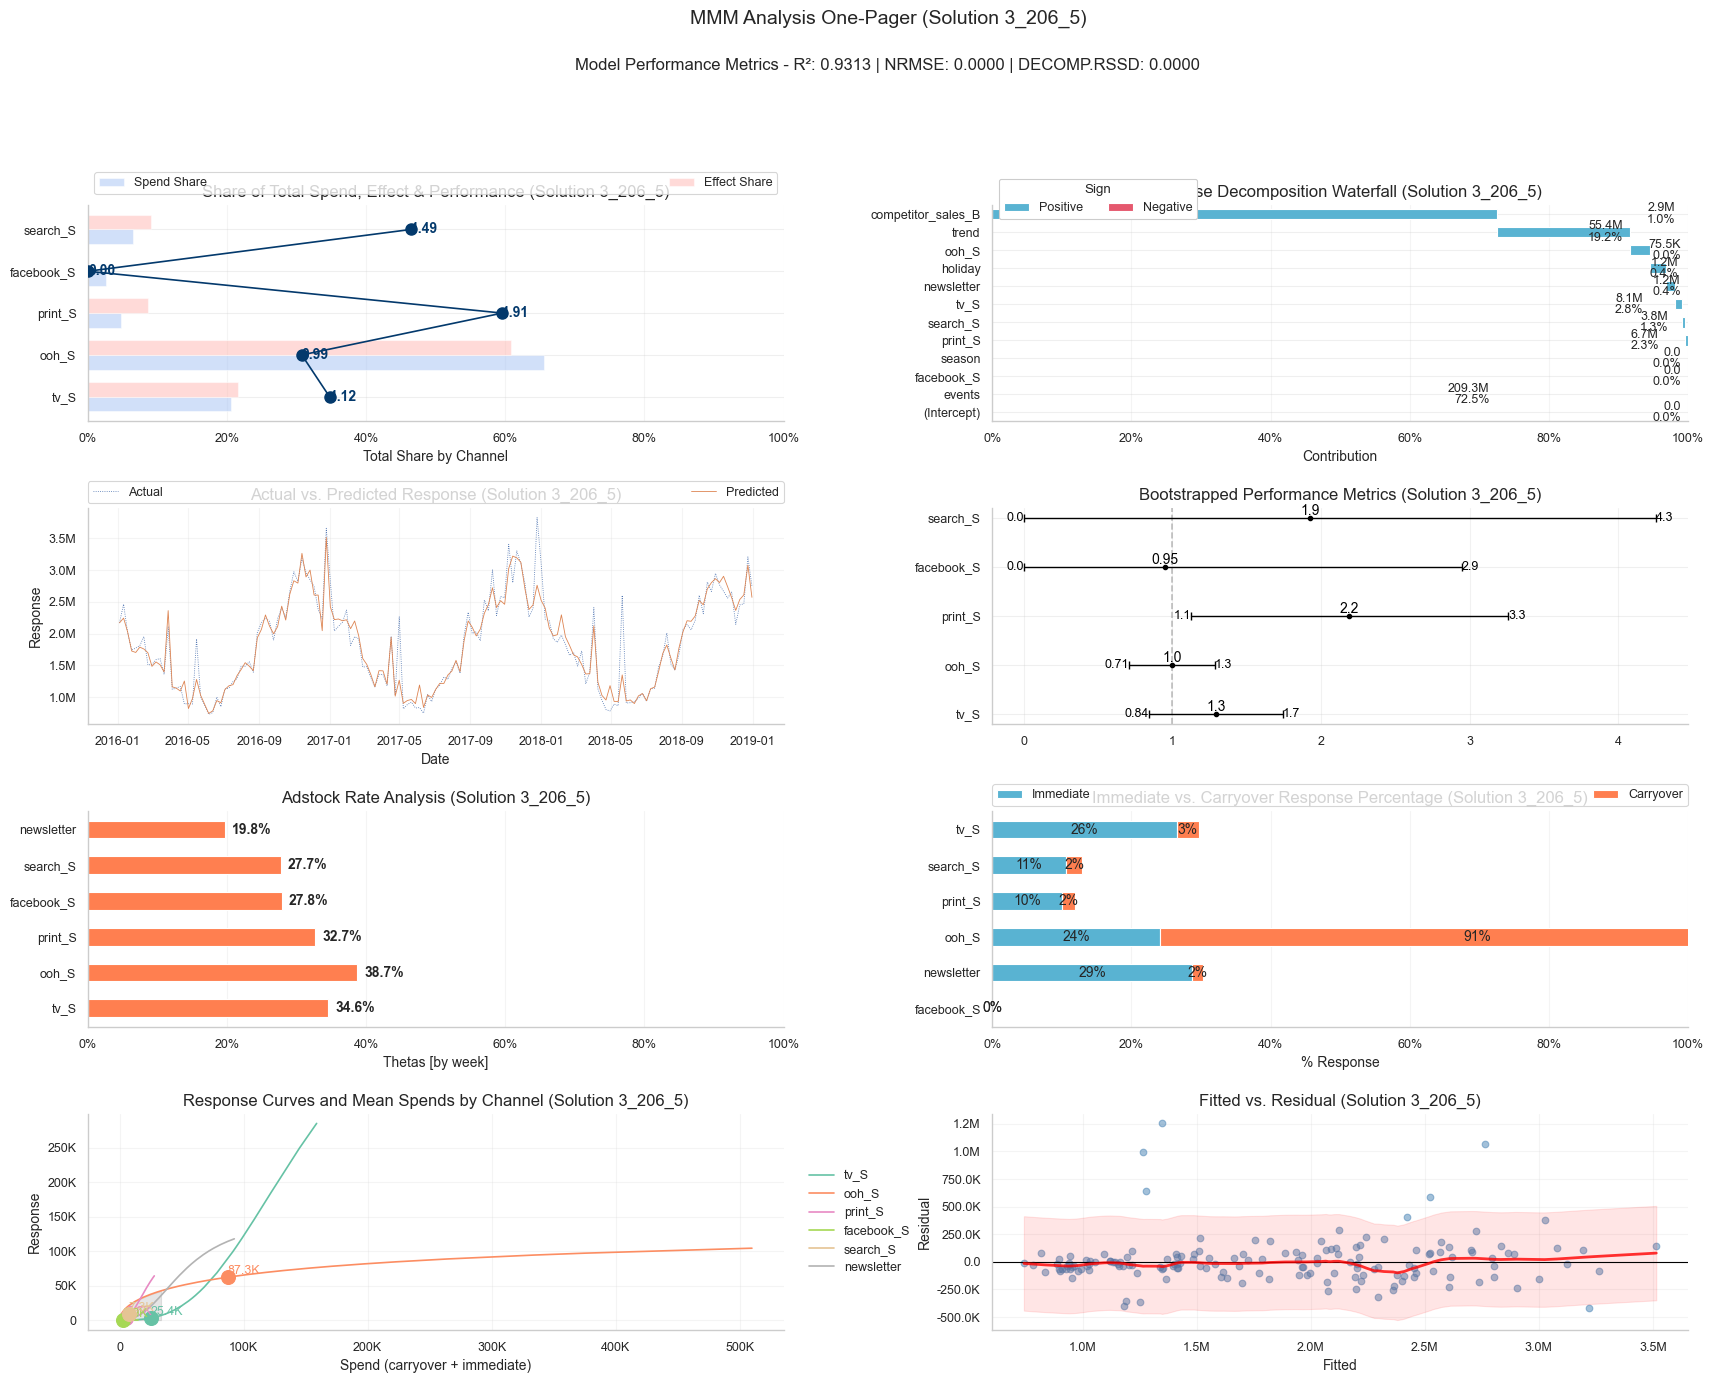

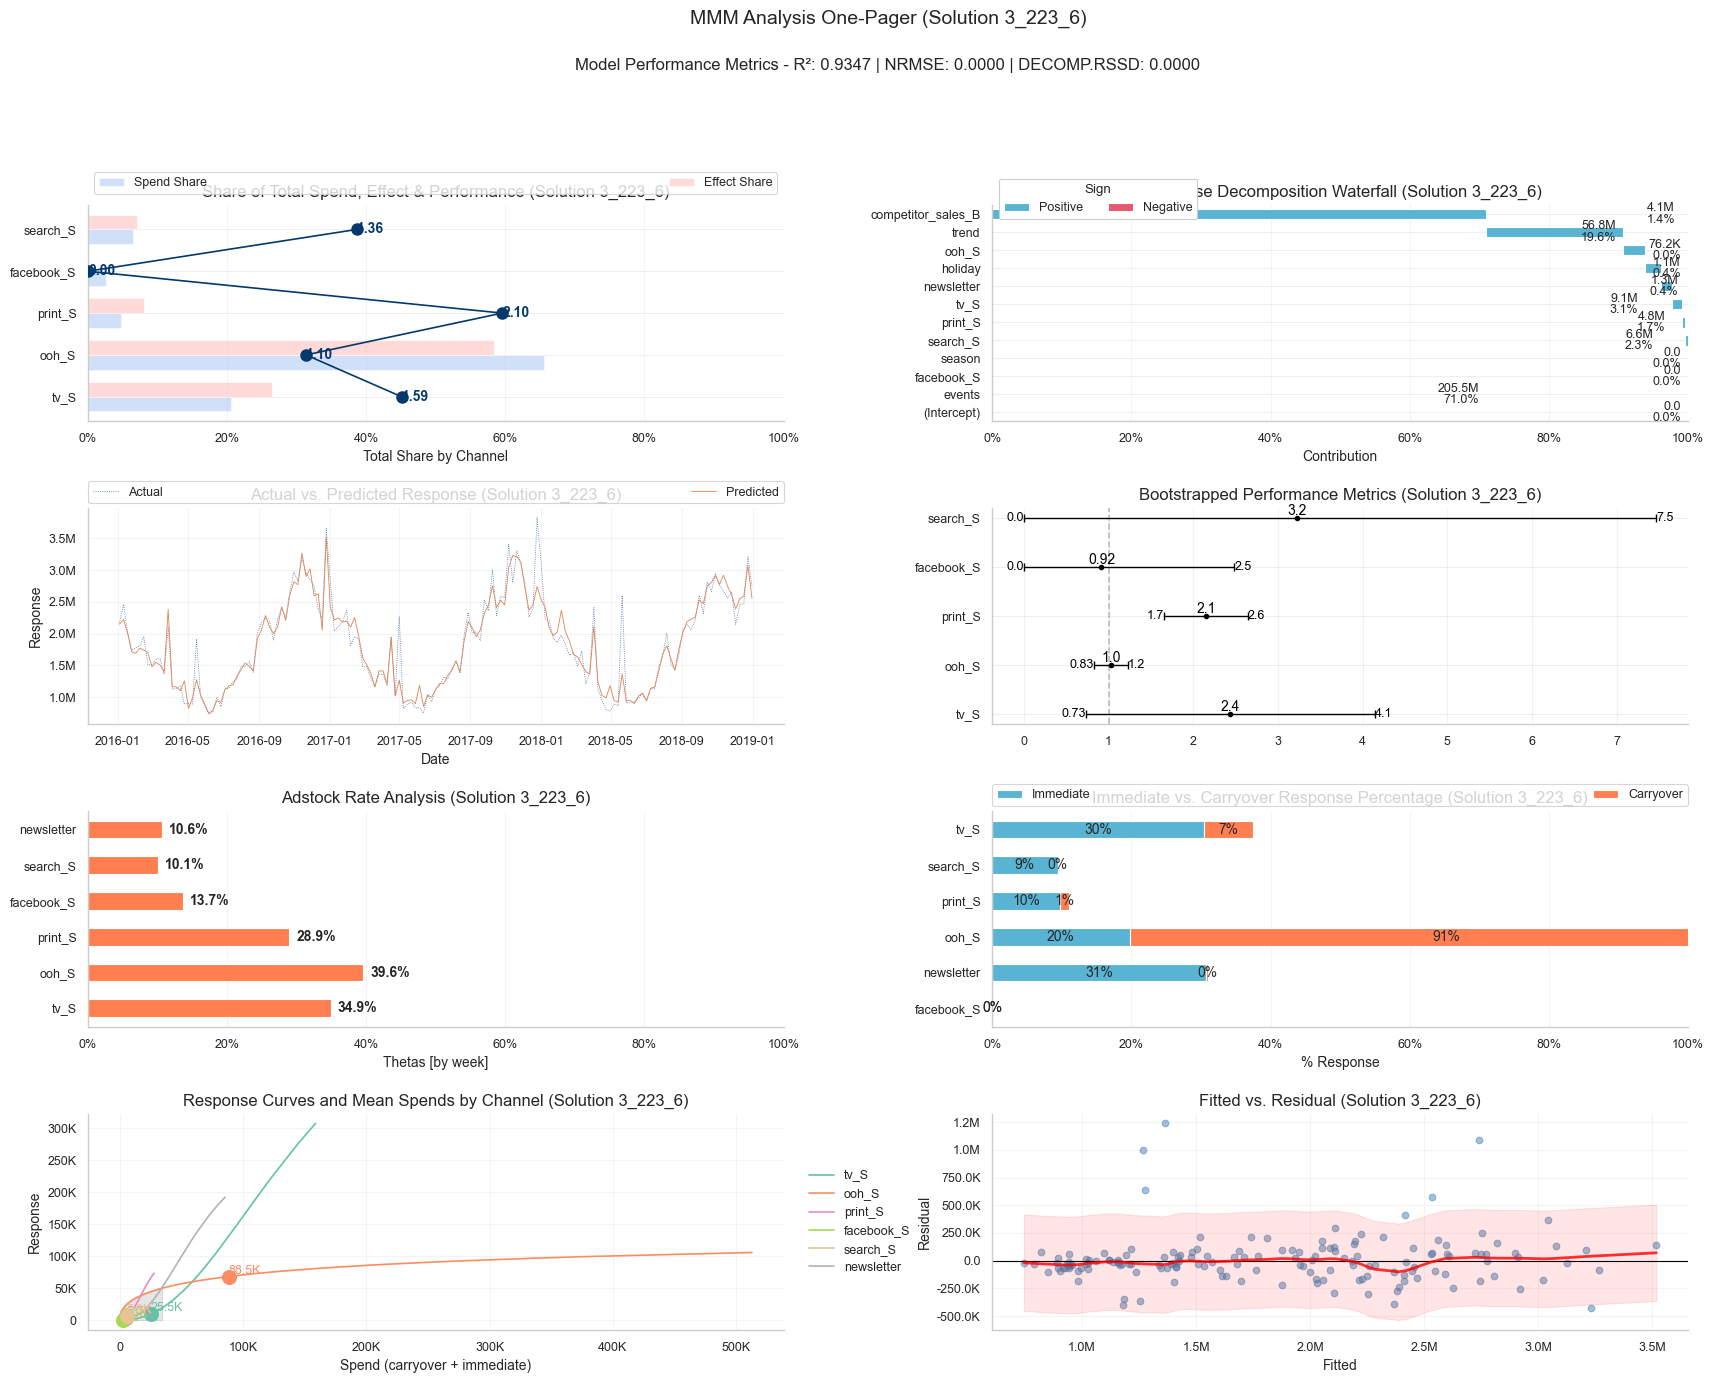

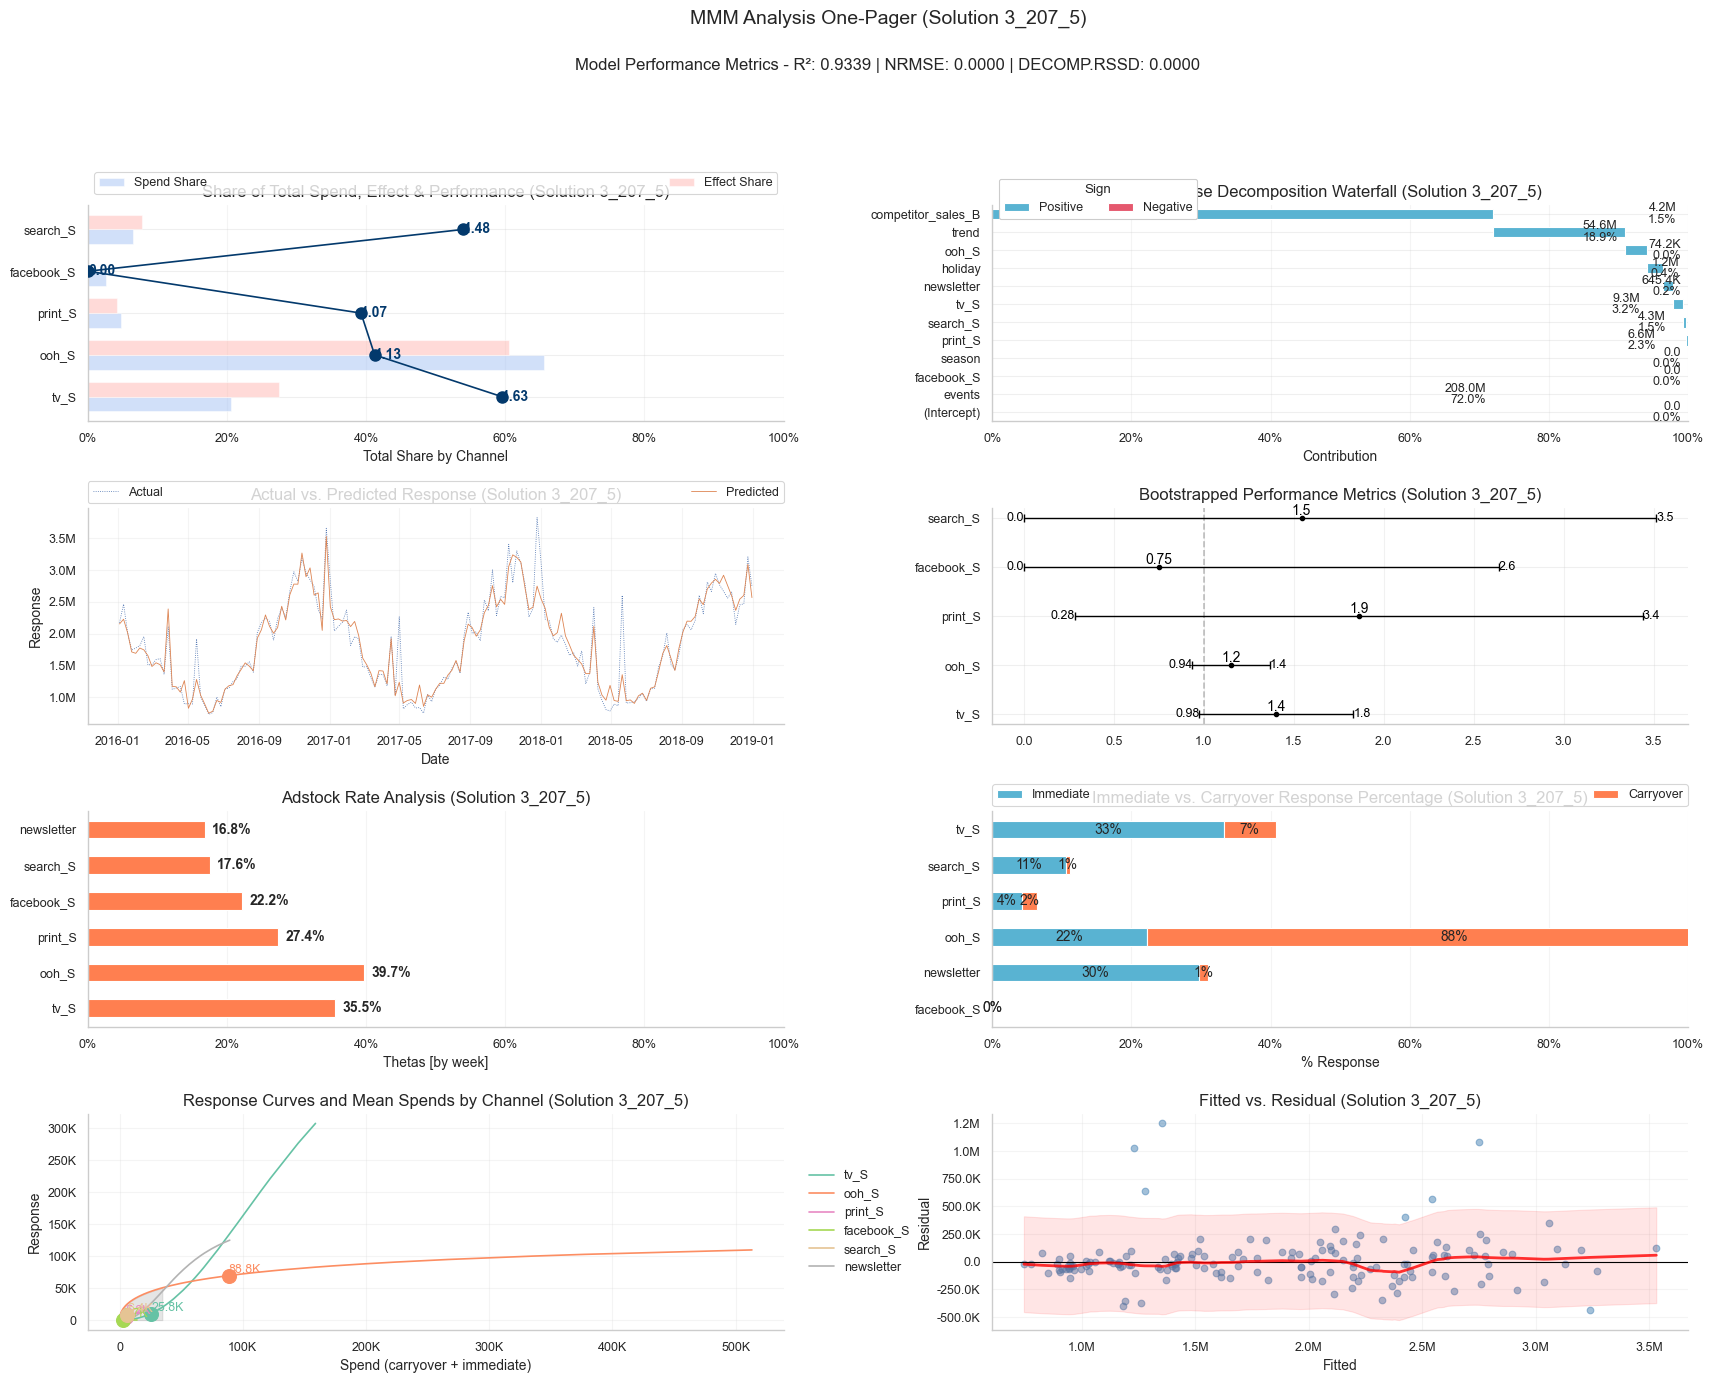

In [13]:
from robyn.data.entities.enums import AdstockType   
from robyn.reporting.onepager_reporting import OnePager

visualizer = OnePager(pareto_result=new_pareto_results, clustered_result=cluster_results, adstock=AdstockType.GEOMETRIC, mmm_data=mmm_data, holidays_data=holidays_data)
visualizer.generate_one_pager(top_pareto=True)